# Avinash Kumar - 1102244010
# Assgn_06_20231017  Mirroring / Distortion on Image  

Load a image (You can choose another image)  
- fill the blank area with opencv python codes and
- get the result images as shown below
- do all 3 questions : mirroring, waving and Lenz Convex/Concave Distortion  
※  You can use other images but do the same image processing and get the same style of the answer image.  

filename and type : yourname_assgn_06.pdf  
Due Date : 23 Oct 0900 a.m. (Monday 0900 a.m. 1 day before the class)   

## 1. Affine Transformation (Mirroring Effect) 

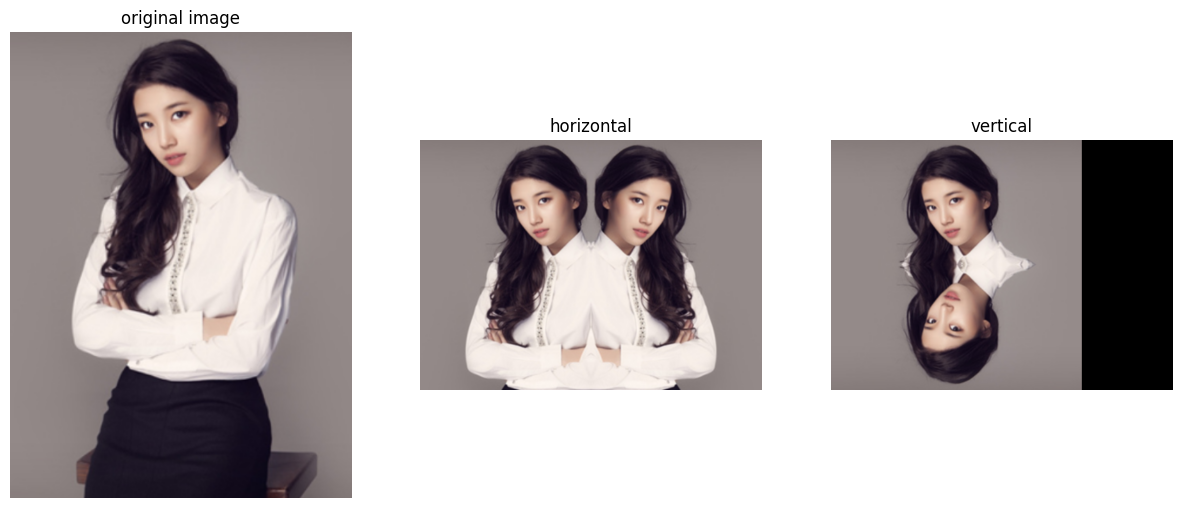

In [10]:
# mirroring.py

import cv2
import numpy as np

img = cv2.imread('./images/practice_img/suji.png')
# print(img.shape)

cols, rows  = img.shape[:2]
map_y, map_x = np.indices((rows, cols), dtype=np.float32)
# print(map_y.shape)

# Mirroring 
map_mirrorh_x,map_mirrorh_y = map_x.copy(), map_y.copy() 
map_mirrorv_x,map_mirrorv_y = map_x.copy(), map_y.copy()
map_mirrorh_x[: , cols//2:] = cols - map_mirrorh_x[:, cols // 2:] - 1  # horizontal mirroring
map_mirrorv_y[rows//2:, :] = rows - map_mirrorv_y[rows // 2:, :] - 1   # vertical mirroring

mirrorh=cv2.remap(img, map_mirrorh_x, map_mirrorh_y, cv2.INTER_LINEAR)
mirrorv=cv2.remap(img, map_mirrorv_x, map_mirrorv_y, cv2.INTER_LINEAR)

cv2.imshow('horizontal mirroring', mirrorh)
cv2.imshow('vertical mirroring', mirrorv)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('original image'), plt.axis('off')
plt.subplot(132), plt.imshow(cv2.cvtColor(mirrorh, cv2.COLOR_BGR2RGB)), plt.title('horizontal'), plt.axis('off')
plt.subplot(133), plt.imshow(cv2.cvtColor(mirrorv, cv2.COLOR_BGR2RGB)), plt.title('vertical'), plt.axis('off')
plt.show()

## 2. Waving

In [11]:
# wave distortion
map_wave_x, map_wave_y = map_x.copy(), map_y.copy()
map_wave_x = 
map_wave_y =    
wave = cv2.remap(                                       )

cv2.imshow('wave', wave)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('off')
plt.subplot(122),plt.imshow(cv2.cvtColor(wave, cv2.COLOR_BGR2RGB)),plt.title('wave'),plt.axis('off')
plt.show()

SyntaxError: invalid syntax (3828175763.py, line 3)

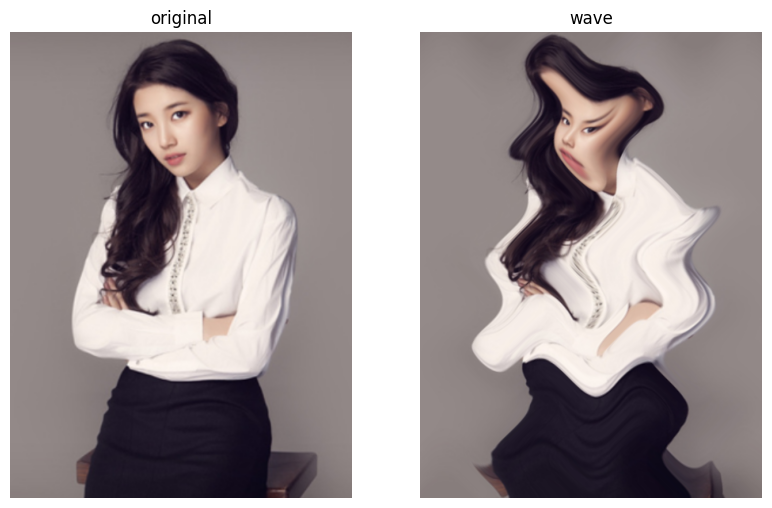

In [9]:
# wave distortion
map_wave_x, map_wave_y = map_x.copy(), map_y.copy()
map_wave_x = map_wave_x + 20*np.sin(map_y/20)
map_wave_y = map_wave_y + 20*np.sin(map_x/20)    
wave = cv2.remap(img,map_wave_x,map_wave_y,cv2.INTER_LINEAR, None, cv2.BORDER_REPLICATE)

cv2.imshow('wave', wave)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

plt.subplot(131),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('off')
plt.subplot(132),plt.imshow(cv2.cvtColor(wave, cv2.COLOR_BGR2RGB)),plt.title('wave'),plt.axis('off')
plt.show()

## 3. Lenz Convex/Concave Distortion

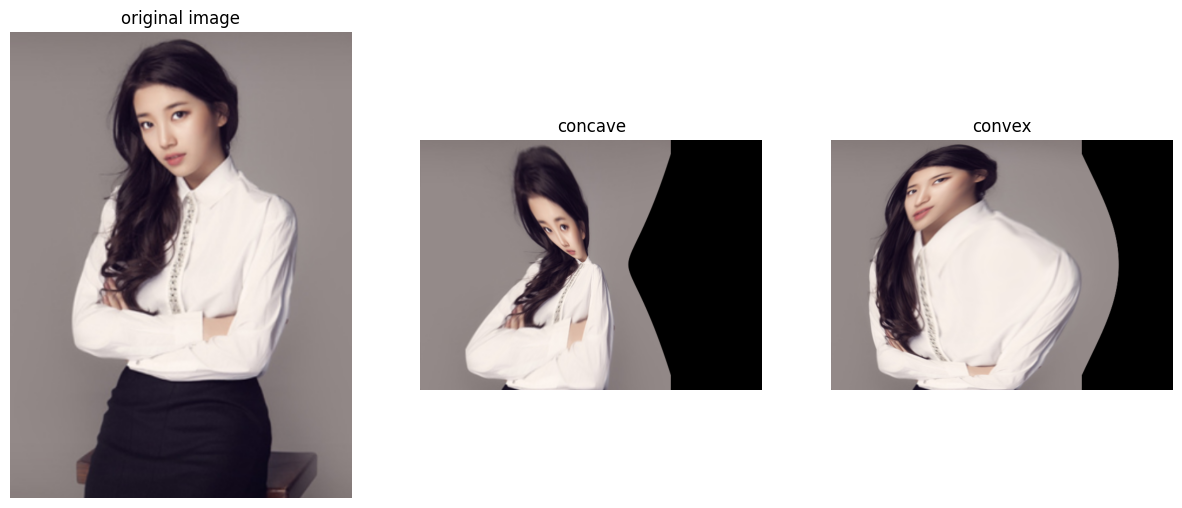

In [12]:
# Parameters for distortion
exp = 2 # Convex, concave indices
scale = 1 # Size of the circle-shaped area (0 ~ 1)
map_lenz_y, map_lenz_x = np.indices((rows, cols), dtype=np.float32)
# Apply distortion
map_lenz_x = 2 * map_lenz_x / (cols - 1) - 1 # Move the center point
map_lenz_y = 2 * map_lenz_y / (rows - 1) - 1
r, theta = cv2.cartToPolar(map_lenz_x, map_lenz_y)
r_convex = r.copy()
r_concave = r.copy()
# Apply convex and concave distortion
r_convex[r < 1] = r_convex[r < 1] ** exp # Convex distortion
r_concave[r < 1] = r_concave[r < 1] ** 0.5 # Concave distortion
# Convert polar coordinates back to Cartesian coordinates
map_convex_x, map_convex_y = cv2.polarToCart(r_convex, theta) # Convex
map_concave_x, map_concave_y = cv2.polarToCart(r_concave, theta) # Concave
# Restore the coordinates to the image dimensions
map_convex_x = ((map_convex_x + 1) * (cols - 1)) / 2 # Convex
map_convex_y = ((map_convex_y + 1) * (rows - 1)) / 2
map_concave_x = ((map_concave_x + 1) * (cols - 1)) / 2 # Concave
map_concave_y = ((map_concave_y + 1) * (rows - 1)) / 2
# Apply remap to create the distorted images
convex = cv2.remap(img, map_convex_x, map_convex_y, cv2.INTER_LINEAR)
concave = cv2.remap(img, map_concave_x, map_concave_y, cv2.INTER_LINEAR)


cv2.imshow('convex', convex)
cv2.imshow('concave', concave)
cv2.waitKey(0)
cv2.destroyAllWindows()

figure(figsize=(15, 10), dpi=100)

plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('original image'), plt.axis('off')
plt.subplot(132), plt.imshow(cv2.cvtColor(concave, cv2.COLOR_BGR2RGB)), plt.title('concave'), plt.axis('off')
plt.subplot(133), plt.imshow(cv2.cvtColor(convex, cv2.COLOR_BGR2RGB)), plt.title('convex'), plt.axis('off')
plt.show()
